# Prediction using model

In [1]:
from tensorflow.keras import layers
from tensorflow.keras.models import load_model
import cv2
import matplotlib.pyplot as plt
from keras.models import load_model

import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout
from tensorflow.keras import layers


## loading the pretrained model


In [3]:
model = load_model("detector.h5")
print("model_loaded")

model_loaded


# For image prediction 

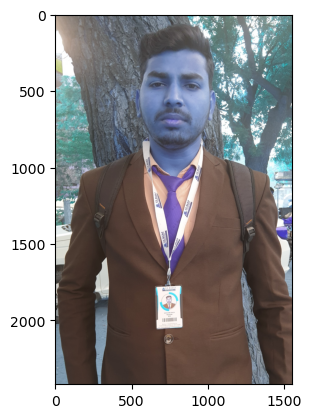

In [7]:
test_img = cv2.imread(r'C:\Users\sanga\Downloads\IDetection Project\totest\w5.jpg')
plt.imshow(test_img)

## converting to input size


In [8]:
test_img.shape

(2419, 1548, 3)

In [9]:

test_img = cv2.resize(test_img,(400,1200))
test_input = test_img.reshape((1,400,1200,3))

In [10]:
res = model.predict(test_input)
print("Icard" if res == 1 else "No Icard")
print(res)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 626ms/step
Icard
[[1.]]


# For real time detection

In [1]:
import cv2
import numpy as np
from tensorflow.keras.models import load_model

# Load the pre-trained model
model = load_model('detector.h5')

# Function to preprocess the frame
def preprocess_frame(frame):
    # Resize to match model input shape
    frame = cv2.resize(frame, (1200, 400))
    # Convert to RGB
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    # Normalize pixel values
    frame = frame / 255.0
    # Expand dimensions to match model input shape
    frame = np.expand_dims(frame, axis=0)
    return frame

# Access the camera
cap = cv2.VideoCapture(0)

while True:
    # Capture frame-by-frame
    ret, frame = cap.read()

    # Preprocess the frame
    preprocessed_frame = preprocess_frame(frame)

    # Perform prediction
    prediction = model.predict(preprocessed_frame)
    prediction_label = "With Strip" if prediction[0][0] > 0.5 else "Without Strip"

    # Display the prediction result
    color = (0, 255, 0) if prediction_label == "With Strip" else (0, 0, 255)
    cv2.putText(frame, prediction_label, (50, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, color, 2, cv2.LINE_AA)
    cv2.imshow('Prediction', frame)

    # Press 'q' to quit
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break


cap.release()
cv2.destroyAllWindows()


C:\Users\sanga\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 364ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 262ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 260ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 246ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 258ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 248ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 258ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 246ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 246ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step


In [2]:
print("hello")

hello
